In [3]:
"""# Aula 10

Exercício 01
"""

import pandas as pd
import seaborn as sns
import numpy as np

def carregar_dados_titanic():
    """Carrega o dataset Titanic a partir do Seaborn.

    Returns:
        pd.DataFrame: DataFrame do Titanic.
    """
    df = sns.load_dataset('titanic')
    print("Dataset Titanic carregado com sucesso via Seaborn.")
    print(f"Shape do DataFrame: {df.shape}")
    return df

def limpar_dados_titanic(df):
    """Limpa o DataFrame do Titanic tratando valores ausentes.

    Args:
        df (pd.DataFrame): DataFrame original do Titanic.

    Returns:
        pd.DataFrame: DataFrame limpo.
    """
    print("\nIniciando limpeza dos dados...")
    print("Valores nulos ANTES da limpeza:\n", df.isnull().sum())

    # Tratar 'age' com a mediana
    mediana_idade = df['age'].median()
    df['age'].fillna(mediana_idade, inplace=True)
    print(f"\n>> 'age' preenchido com mediana: {mediana_idade}")

    # Tratar 'embarked' com a moda
    # Nota: 'embark_town' também tem nulos e geralmente corresponde a 'embarked'.
    # Vamos preencher ambos com a moda de 'embarked'.
    moda_embarked = df['embarked'].mode()[0]
    df['embarked'].fillna(moda_embarked, inplace=True)
    df['embark_town'].fillna(df[df['embarked'] == moda_embarked]['embark_town'].mode()[0], inplace=True)
    print(f">> 'embarked' preenchido com moda: {moda_embarked}")
    print(f">> 'embark_town' preenchido com valor correspondente à moda de 'embarked'.")

    # Remover 'deck' e 'cabin'
    colunas_para_remover = []
    if 'deck' in df.columns:
        colunas_para_remover.append('deck')
    if 'cabin' in df.columns:
         colunas_para_remover.append('cabin')

    if colunas_para_remover:
        df.drop(columns=colunas_para_remover, inplace=True)
        print(f">> Colunas {colunas_para_remover} removidas.")
    else:
        print(">> Colunas 'deck' e 'cabin' não encontradas para remoção.")


    print("\nValores nulos APÓS a limpeza:\n", df.isnull().sum())
    if df.isnull().sum().sum() == 0:
        print("\n>> Todos os valores nulos tratados com sucesso!")
    else:
        print("\n>> Atenção: Ainda existem valores nulos!")

    print("Limpeza concluída.")
    return df

# --- Execução ---
titanic_df_original = carregar_dados_titanic()
titanic_df_limpo = limpar_dados_titanic(titanic_df_original.copy()) # Usar cópia!

print("\nPrimeiras 5 linhas do DataFrame limpo:")
print(titanic_df_limpo.head())


Dataset Titanic carregado com sucesso via Seaborn.
Shape do DataFrame: (891, 15)

Iniciando limpeza dos dados...
Valores nulos ANTES da limpeza:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

>> 'age' preenchido com mediana: 28.0
>> 'embarked' preenchido com moda: S
>> 'embark_town' preenchido com valor correspondente à moda de 'embarked'.
>> Colunas ['deck'] removidas.

Valores nulos APÓS a limpeza:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

>> Todos os valores nulos tratados com sucesso!
Limpeza concluída.

Primeiras 5 linhas do 

<ipython-input-3-6cd7466f3f7c>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mediana_idade, inplace=True)
<ipython-input-3-6cd7466f3f7c>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [4]:
"""Exercício 02"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def preparar_dados_para_modelo(df):
    """Prepara o DataFrame limpo para o modelo de ML.

    Seleciona features, trata categóricas e define X e y.

    Args:
        df (pd.DataFrame): DataFrame limpo do Titanic.

    Returns:
        tuple: Contendo X (features) e y (target).
    """
    print("\nPreparando dados para o modelo...")
    # Selecionar colunas potenciais (remover as que não usaremos)
    df_modelo = df.drop(columns=['alive', 'who', 'adult_male', 'embark_town', 'alone'])

    # Converter 'sex' para numérico (0 ou 1)
    le = LabelEncoder()
    df_modelo['sex'] = le.fit_transform(df_modelo['sex'])
    print(">> Coluna 'sex' convertida para numérica.")

    # Converter 'embarked' e 'class' usando One-Hot Encoding
    df_modelo = pd.get_dummies(df_modelo, columns=['embarked', 'class'], drop_first=True)
    print(">> Colunas 'embarked' e 'class' convertidas com One-Hot Encoding.")

    # Definir X e y
    X = df_modelo.drop('survived', axis=1)
    y = df_modelo['survived']

    print(">> Features (X) e Target (y) definidos.")
    print("Shape de X:", X.shape)
    print("Shape de y:", y.shape)

    return X, y

def treinar_avaliar_modelo_titanic(X, y, test_size=0.3, random_state=42):
    """Divide os dados, treina Regressão Logística e avalia.

    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Target.
        test_size (float): Proporção para o conjunto de teste.
        random_state (int): Seed para reprodutibilidade.

    Returns:
        float: Acurácia do modelo no conjunto de teste.
    """
    print("\nDividindo dados em treino e teste...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f">> Dados divididos: {len(X_train)} treino, {len(X_test)} teste.")

    print("\nTreinando modelo de Regressão Logística...")
    modelo = LogisticRegression(max_iter=1000) # Aumentar max_iter pode ser necessário
    modelo.fit(X_train, y_train)
    print(">> Modelo treinado.")

    print("\nFazendo previsões e avaliando...")
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(f">> Acurácia no conjunto de teste: {acuracia:.4f}")

    return acuracia

# --- Execução ---
X_titanic, y_titanic = preparar_dados_para_modelo(titanic_df_limpo.copy())
acuracia_titanic = treinar_avaliar_modelo_titanic(X_titanic, y_titanic)


Preparando dados para o modelo...
>> Coluna 'sex' convertida para numérica.
>> Colunas 'embarked' e 'class' convertidas com One-Hot Encoding.
>> Features (X) e Target (y) definidos.
Shape de X: (891, 10)
Shape de y: (891,)

Dividindo dados em treino e teste...
>> Dados divididos: 623 treino, 268 teste.

Treinando modelo de Regressão Logística...
>> Modelo treinado.

Fazendo previsões e avaliando...
>> Acurácia no conjunto de teste: 0.8022


In [5]:
"""Exercício 03"""

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def comparar_estimadores_iris(test_size=0.25, random_state=42):
    """Carrega Iris, treina KNN e SVC, e salva resultados em TXT.

    Args:
        test_size (float): Proporção para o conjunto de teste.
        random_state (int): Seed para reprodutibilidade.

    Returns:
        dict: Dicionário com as acurácias de cada modelo.
    """
    print("\n--- Exercício 3: Comparando Estimadores no Iris ---")
    # 1. Carregar dados
    iris = load_iris()
    X_iris, y_iris = iris.data, iris.target
    print(">> Dataset Iris carregado.")
    print(f">> Features: {iris.feature_names}")
    print(f">> Classes: {iris.target_names}")

    # 2. Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=test_size, random_state=random_state)
    print(f">> Dados divididos: {len(X_train)} treino, {len(X_test)} teste.")

    resultados = {}

    # 3. Treinar e Avaliar KNN
    print("\nTreinando K-Nearest Neighbors (KNN)...")
    knn = KNeighborsClassifier(n_neighbors=3) # Exemplo com k=3
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    resultados['KNN'] = acc_knn
    print(f">> Acurácia KNN: {acc_knn:.4f}")

    # 4. Treinar e Avaliar SVC
    print("\nTreinando Support Vector Classifier (SVC)...")
    svc = SVC() # Usando parâmetros default
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    acc_svc = accuracy_score(y_test, y_pred_svc)
    resultados['SVC'] = acc_svc
    print(f">> Acurácia SVC: {acc_svc:.4f}")

    # 5. Salvar resultados em TXT
    nome_arquivo = 'resultados_iris.txt'
    try:
        with open(nome_arquivo, 'w') as f:
            f.write("Resultados da Comparação de Modelos no Dataset Iris\n")
            f.write("="*50 + "\n")
            for modelo, acuracia in resultados.items():
                f.write(f"Modelo: {modelo}\n")
                f.write(f"Acurácia no conjunto de teste: {acuracia:.4f}\n")
                f.write("-" * 20 + "\n")
        print(f"\n>> Resultados salvos em '{nome_arquivo}'. Verifique no painel 'Arquivos' do Colab.")
    except Exception as e:
        print(f"\n>> Erro ao salvar arquivo '{nome_arquivo}': {e}")

    return resultados

# --- Execução ---
resultados_comparacao = comparar_estimadores_iris()


--- Exercício 3: Comparando Estimadores no Iris ---
>> Dataset Iris carregado.
>> Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
>> Classes: ['setosa' 'versicolor' 'virginica']
>> Dados divididos: 112 treino, 38 teste.

Treinando K-Nearest Neighbors (KNN)...
>> Acurácia KNN: 1.0000

Treinando Support Vector Classifier (SVC)...
>> Acurácia SVC: 1.0000

>> Resultados salvos em 'resultados_iris.txt'. Verifique no painel 'Arquivos' do Colab.


Dataset de alunos carregado de 'Students_Grading_Dataset.csv'.
Shape do DataFrame: (5000, 23)
Colunas: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']

--- Exercício 4: Visualizando Dados dos Alunos ---


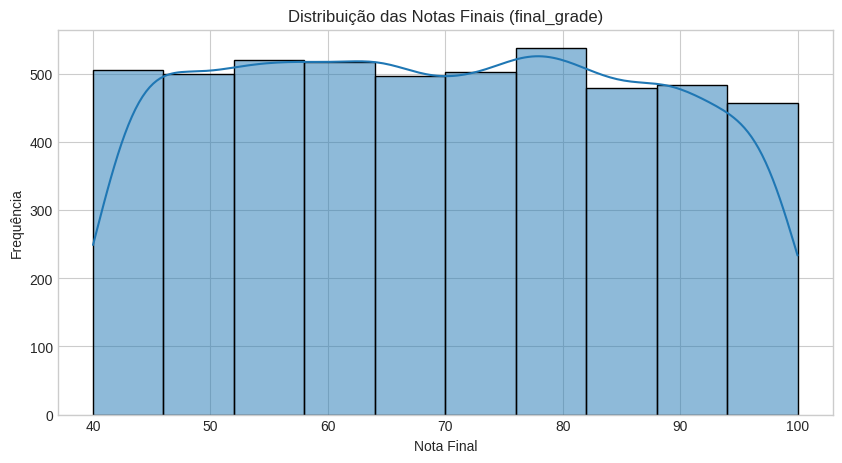

>> Gráfico 1: Histograma de 'final_grade' gerado.


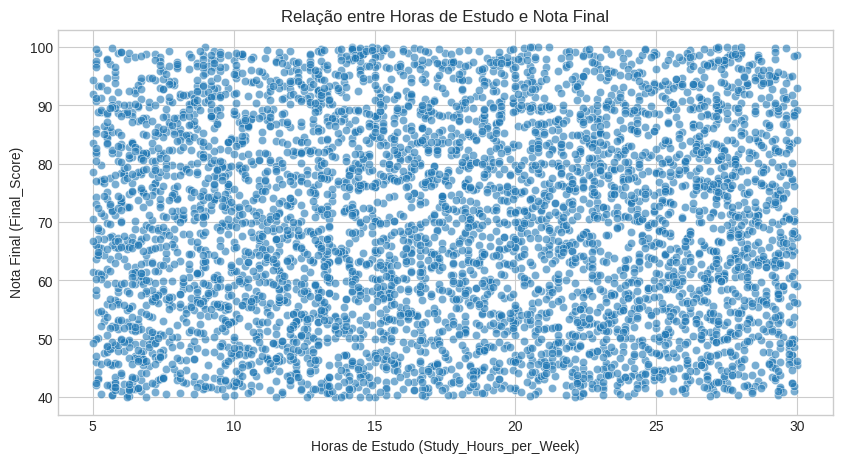

>> Gráfico 2: Scatter plot de 'Study_Hours_per_Week' vs 'Final_Score' gerado.


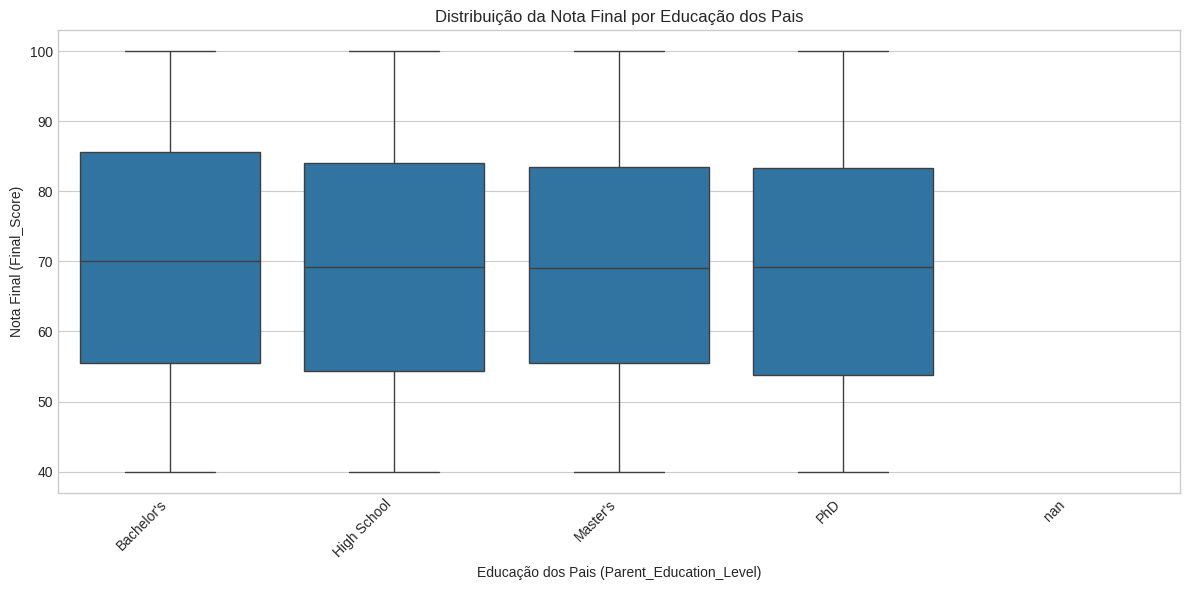

>> Gráfico 3: Box plot de 'Final_Score' por 'Parent_Education_Level' gerado.


In [6]:
"""Exercício 04"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Usaremos seaborn para facilitar alguns plots
import kagglehub # Para carregar o arquivo direto do site.
from kagglehub import KaggleDatasetAdapter

def carregar_dados_alunos(nomeArquivo='Students_Grading_Dataset.csv'):
    """Carrega o dataset de notas de alunos do arquivo CSV.

    Args:
        nomeArquivo (str): Caminho para o arquivo CSV no ambiente Colab.

    Returns:
        pd.DataFrame: DataFrame com os dados dos alunos.
    """
    try:
        df = pd.read_csv(nomeArquivo)
        print(f"Dataset de alunos carregado de '{nomeArquivo}'.")
        print(f"Shape do DataFrame: {df.shape}")
        # Verificar nomes das colunas (importante!)
        print("Colunas:", df.columns.tolist())
        return df
    except FileNotFoundError:
        print(f"Erro: Arquivo '{nomeArquivo}' não encontrado.")
        print("Fazendo download diretamente do site.")
        try:
          # Download diretamente do site
          # "\" serve para quebrar a
          # linha e deixar o código mais legível
          # Verifique se este é o nome correto do arquivo no dataset
          path = kagglehub.dataset_download("mahmoudelhemaly/students-grading-dataset")
          caminho_completo_csv = os.path.join(path, nomeArquivo)
          print(f"Tentando carregar o arquivo: {caminho_completo_csv}")

          # Verificar se o arquivo existe antes de tentar carregar
          if os.path.exists(caminho_completo_csv):
          # Usar pandas para carregar o arquivo CSV para um DataFrame
             df = pd.read_csv(caminho_completo_csv)
             return df
          else:
            raise Exception (f"Arquivo não encontrado {caminho_completo_csv}")
        except Exception as e:
          print(f"Erro ao fazer download do dataset: {e}")
          return None
    except Exception as e:
        print(f"Erro ao carregar o arquivo: {e}")
        return None


def visualizar_dados_alunos(df):
    """Gera 3 tipos de gráficos para explorar o dataset de alunos.

    Args:
        df (pd.DataFrame): DataFrame dos alunos.
    """
    if df is None:
        print("DataFrame não carregado. Não é possível gerar gráficos.")
        return

    print("\n--- Exercício 4: Visualizando Dados dos Alunos ---")
    plt.style.use('seaborn-v0_8-whitegrid') # Estilo visual

    # Gráfico 1: Histograma das Notas Finais
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Final_Score'], kde=True, bins=10)
    plt.title('Distribuição das Notas Finais (final_grade)')
    plt.xlabel('Nota Final')
    plt.ylabel('Frequência')
    plt.show()
    print(">> Gráfico 1: Histograma de 'final_grade' gerado.")

    # Gráfico 2: Dispersão (Study Hours vs Final Grade)
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='Study_Hours_per_Week', y='Final_Score', data=df, alpha=0.6)
    plt.title('Relação entre Horas de Estudo e Nota Final')
    plt.xlabel('Horas de Estudo (Study_Hours_per_Week)')
    plt.ylabel('Nota Final (Final_Score)')
    plt.show()
    print(">> Gráfico 2: Scatter plot de 'Study_Hours_per_Week' vs 'Final_Score' gerado.")

    # Gráfico 3: Box Plot (Final Grade por Parent Education)
    # Ordenar as categorias de educação para melhor visualização
    ordem_educacao = sorted(df['Parent_Education_Level'].unique(), key=lambda x: str(x)) # Ordem simples
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Parent_Education_Level', y='Final_Score', data=df, order=ordem_educacao)
    plt.title('Distribuição da Nota Final por Educação dos Pais')
    plt.xlabel('Educação dos Pais (Parent_Education_Level)')
    plt.ylabel('Nota Final (Final_Score)')
    plt.xticks(rotation=45, ha='right') # Rotacionar labels se forem muitos
    plt.tight_layout() # Ajustar layout
    plt.show()
    print(">> Gráfico 3: Box plot de 'Final_Score' por 'Parent_Education_Level' gerado.")

# --- Execução ---
# Certifique-se que o nome do arquivo corresponde ao que você fez upload
alunos_df = carregar_dados_alunos('Students_Grading_Dataset.csv')
if alunos_df is not None:
    visualizar_dados_alunos(alunos_df)
